# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Preprocess data

In [2]:
# Load the data from the Excel file
data = pd.read_excel('HW1.xlsx',header=0)

# Split the dataset into training, validation and testing sets
X_train = data.iloc[:200, :3].values
y_train = data.iloc[:200, 3].values
X_val = data.iloc[200:300, :3].values
y_val = data.iloc[200:300, 3].values
X_test = data.iloc[300:, :3].values
y_test = data.iloc[300:, 3].values

# Standardize the input features using the mean and standard deviation of the training set
X_mean = np.mean(X_train, axis=0)
X_std = np.std(X_train, axis=0)
X_train = (X_train - X_mean) / X_std
X_val = (X_val - X_mean) / X_std
X_test = (X_test - X_mean) / X_std


## Check for missing data

In [3]:
print(data.isnull().sum())

X1    0
X2    0
X3    0
Y     0
dtype: int64


# Define MSE cost function and gradient descent function 

In [4]:
def cost_function(X, y, theta):
    m = len(y)
    J = np.sum((X.dot(theta) - y) ** 2) / (2 * m)
    return J

def gradient_descent(X, y, x_test, y_test, theta, alpha, num_iters, X_val=None, y_val=None, early_stopping=None):
    m = len(y)
    train_J_list = []
    val_J_list = []
    test_J_list = []
    prev_val_J = np.inf
    no_improvement_count = 0
    for i in range(num_iters):
        h = X.dot(theta)                                    #predicted values of the target variable
        theta = theta - alpha * (1 / m) * X.T.dot(h - y)    #weight update function
        J = cost_function(X, y, theta) 
        train_J_list.append(J)
        if X_val is not None and y_val is not None:
            val_J = cost_function(X_val, y_val, theta)      #calculate J on validation set
            val_J_list.append(val_J)                        #track validation J

            y_pred = x_test.dot(theta)                      #predict test set per iteration
            mse = np.mean((y_test - y_pred) ** 2)           #calculate test mse
            test_J_list.append(mse)                         #track test mse
            
            #Define stopping criteria
            if val_J >= prev_val_J:
                no_improvement_count += 1
                if no_improvement_count >= early_stopping:
                    print(f"Early stopping at iteration {i}")
                    break
            else:
                prev_val_J = val_J
                no_improvement_count = 0
    if X_val is not None and y_val is not None:
        return theta, train_J_list, val_J_list, test_J_list
    else:
        return theta, train_J_list

# Define the learning rate, max iterations and stopping condition

In [5]:
learning_rates = [0.1, 0.01, 0.001]     #learning rate alpha
max_iters = 1000                        #max iterations = 1000
early_stopping = 10                     #early stopping count = 10

# Perform linear regression on Single input – single output combinations

Early stopping at iteration 41
alpha = 0.1
MSE = 169.7941610125706
Early stopping at iteration 348
alpha = 0.01
MSE = 169.80598785609186
alpha = 0.001
MSE = 349.50071991844794


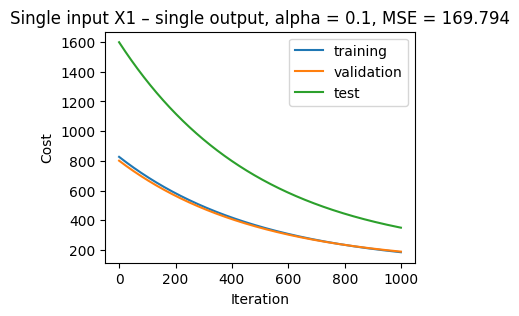

Best MSE of Single input X1 – single output = 169.794, best alpha = 0.1
Early stopping at iteration 39
alpha = 0.1
MSE = 84.54064885881562
Early stopping at iteration 320
alpha = 0.01
MSE = 85.37910144043782
alpha = 0.001
MSE = 278.0387657024362


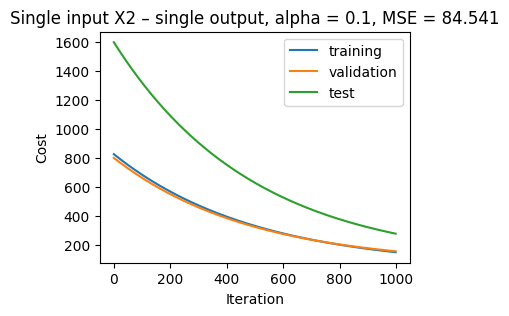

Best MSE of Single input X2 – single output = 84.541, best alpha = 0.1
Early stopping at iteration 40
alpha = 0.1
MSE = 111.28163014228811
Early stopping at iteration 338
alpha = 0.01
MSE = 112.62760729907617
alpha = 0.001
MSE = 312.305264290484


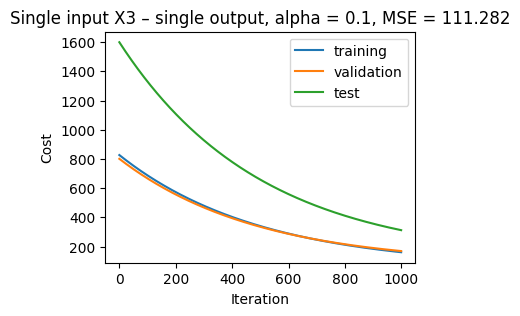

Best MSE of Single input X3 – single output = 111.282, best alpha = 0.1


In [6]:
MSE_single_input = []
best_alphas = []
for i in range(3):
    #extract the i-th input feature (X1, X2, X3)
    X_train_i = X_train[:, i].reshape(-1, 1)
    X_val_i = X_val[:, i].reshape(-1, 1)
    X_test_i = X_test[:, i].reshape(-1, 1)
    
    #perform linear regression on the i-th input feature
    best_alpha = None
    best_mse = float('inf')
    #loop through 3 leaning rates
    for alpha in learning_rates:
        theta = np.zeros(2)
        X_train_i_ = np.concatenate([np.ones((len(X_train_i), 1)), X_train_i], axis=1)  #concat X_train_i to a column of ones
        X_val_i_ = np.concatenate([np.ones((len(X_val_i), 1)), X_val_i], axis=1)        #concat X_val_i to a column of ones
        X_test_i_ = np.concatenate([np.ones((len(X_test_i), 1)), X_test_i], axis=1)     #concat X_test_i to a column of ones
        theta, train_J_list, val_J_list, test_J_list = gradient_descent(X_train_i_, y_train, X_test_i_, y_test, theta, alpha, max_iters, X_val=X_val_i_, y_val=y_val, early_stopping=early_stopping)
        
        y_pred = X_test_i_.dot(theta)               #predict y on test set
        mse = np.mean((y_test - y_pred) ** 2)       #calculate MSE
        if mse < best_mse:                          #update MSE and alphas based on the best MSE
            best_mse = mse                          
            best_alpha = alpha
        #print alphas following by MSE
        print(f'alpha = {alpha}')
        print(f'MSE = {mse}')
    MSE_single_input.append(best_mse)               #store MSE for X1, X2, X3
    best_alphas.append(best_alpha)                  #store best alphas for X1, X2, X3

    #plot cost function against train, validation, test sets for the best perfomance models of features
    plt.figure(figsize=(4, 3))
    plt.plot(range(len(train_J_list)), train_J_list, label='training')
    plt.plot(range(len(val_J_list)), val_J_list, label='validation')
    plt.plot(range(len(test_J_list)), test_J_list, label='test')
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.title(f'Single input X{i+1} – single output, alpha = {best_alpha:.1f}, MSE = {best_mse:.3f}')
    plt.legend()
    plt.show()
    
    print(f'Best MSE of Single input X{i+1} – single output = {best_mse:.3f}, best alpha = {best_alpha}')

# Perform linear regression on Double input – single output combinations

Early stopping at iteration 38
alpha = 0.1
MSE = 86.03361120099699
Early stopping at iteration 317
alpha = 0.01
MSE = 86.80447481839506
alpha = 0.001
MSE = 276.55603946093737


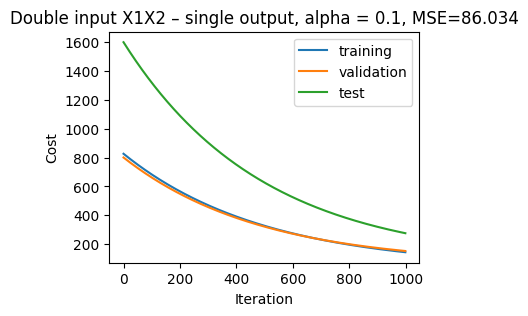

Best MSE of Double input X1X2 – single output, best alpha = 0.1: 86.034
Early stopping at iteration 40
alpha = 0.1
MSE = 75.15777657434109
Early stopping at iteration 334
alpha = 0.01
MSE = 76.34426132235306
alpha = 0.001
MSE = 272.28817435543266


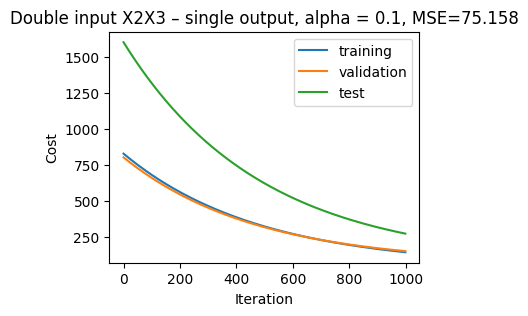

Best MSE of Double input X2X3 – single output, best alpha = 0.1: 75.158
Early stopping at iteration 40
alpha = 0.1
MSE = 108.29657607244494
Early stopping at iteration 331
alpha = 0.01
MSE = 109.6717241297802
alpha = 0.001
MSE = 307.74804254846816


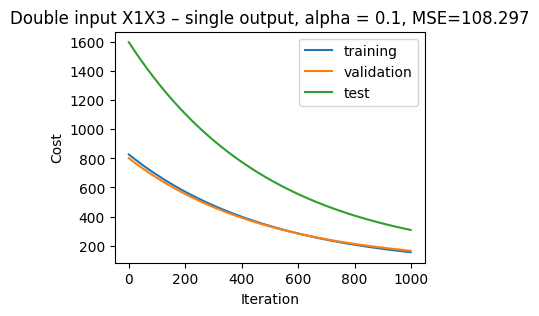

Best MSE of Double input X1X3 – single output, best alpha = 0.1: 108.297


In [7]:
MSE_double_input = []
feature_combinations = [(0, 1), (1, 2), (0, 2)] #3 feature combinations: X1X2, X2X3, X1X3
best_alphas = []
for feature in feature_combinations:
    # Extract the i-th input feature
    X_train_i = X_train[:, feature]
    X_val_i = X_val[:, feature]
    X_test_i = X_test[:, feature]
    
    # Perform linear regression on the i-th input feature
    best_alpha = None
    best_mse = float('inf')
    for alpha in learning_rates:
        theta = np.zeros(3)
        X_train_i_ = np.concatenate([np.ones((len(X_train_i), 1)), X_train_i], axis=1)
        X_val_i_ = np.concatenate([np.ones((len(X_val_i), 1)), X_val_i], axis=1)
        X_test_i_ = np.concatenate([np.ones((len(X_test_i), 1)), X_test_i], axis=1)
        theta, train_J_list, val_J_list, test_J_list = gradient_descent(X_train_i_, y_train, X_test_i_, y_test, theta, alpha, max_iters, X_val=X_val_i_, y_val=y_val, early_stopping=early_stopping)
        
        y_pred = X_test_i_.dot(theta)
        mse = np.mean((y_test - y_pred) ** 2)
        if mse < best_mse:
            best_mse = mse
            best_alpha = alpha
        print(f'alpha = {alpha}')
        print(f'MSE = {mse}')
    
    MSE_double_input.append(best_mse)
    best_alphas.append(best_alpha)

    plt.figure(figsize=(4, 3))
    plt.plot(range(len(train_J_list)), train_J_list, label='training')
    plt.plot(range(len(val_J_list)), val_J_list, label='validation')
    plt.plot(range(len(test_J_list)), test_J_list, label='test')
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.title(f'Double input X{feature[0]+1}X{feature[1]+1} – single output, alpha = {best_alpha:.1f}, MSE={best_mse:.3f}')
    plt.legend()
    plt.show()
    
    print(f'Best MSE of Double input X{feature[0]+1}X{feature[1]+1} – single output, best alpha = {best_alpha:.1f}: {best_mse:.3f}')

# Perform linear regression on Tripe input – single output combination

Early stopping at iteration 39
alpha = 0.1
MSE = 74.30162064059525
Early stopping at iteration 328
alpha = 0.01
MSE = 75.34732763479781
alpha = 0.001
MSE = 268.52593959697367


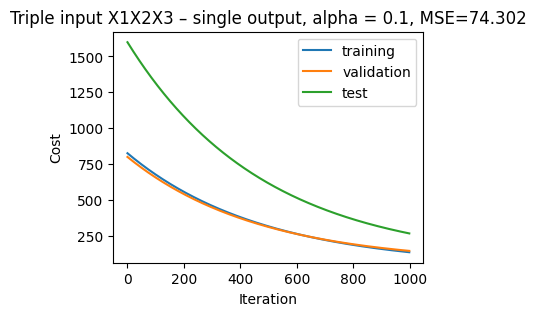

Best MSE of Triple input X1X2X3 – single output, best alpha = 0.1: 74.302


In [8]:
MSE_triple_input = []
best_mse = float('inf')
best_alpha = None
for alpha in learning_rates:
    theta = np.zeros(4)
    X_train_ = np.concatenate([np.ones((len(X_train), 1)), X_train], axis=1)
    X_val_ = np.concatenate([np.ones((len(X_val), 1)), X_val], axis=1)
    X_test_ = np.concatenate([np.ones((len(X_test), 1)), X_test], axis=1)
    theta, train_J_list, val_J_list, test_J_list = gradient_descent(X_train_, y_train, X_test_, y_test, theta, alpha, max_iters, X_val=X_val_, y_val=y_val, early_stopping=early_stopping)
    
    y_pred = X_test_.dot(theta)
    mse = np.mean((y_test - y_pred) ** 2)
    MSE_triple_input.append(mse)
    if mse < best_mse:
        best_mse = mse
        best_alpha = alpha
    print(f'alpha = {alpha}')
    print(f'MSE = {mse}')

plt.figure(figsize=(4, 3))
plt.plot(range(len(train_J_list)), train_J_list, label='training')
plt.plot(range(len(val_J_list)), val_J_list, label='validation')
plt.plot(range(len(test_J_list)), test_J_list, label='test')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title(f'Triple input X1X2X3 – single output, alpha = {best_alpha:.1f}, MSE={best_mse:.3f}')
plt.legend()
plt.show()

print(f'Best MSE of Triple input X1X2X3 – single output, best alpha = {best_alpha:.1f}: {best_mse:.3f}')


In [9]:
# Get the best MSE of from 7 feature combination train
print(min(MSE_single_input+MSE_double_input+MSE_triple_input))

74.30162064059525


## From the above code we can conclude the best performing feature combination for model training

The best combination is Triple input feature combination with learning rate alpha = 0.1. In this case, best MSE = 74.30162064059525

# Plot the Actual versus Predicted output on the test set for the best performing feature combination

Early stopping at iteration 39


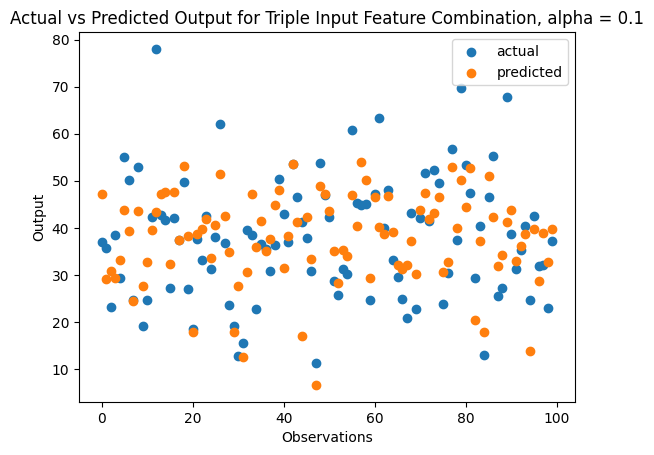

In [10]:
# Retraining the model using above conclusion 
alpha_plot = 0.1
theta = np.zeros(4)
X_train_ = np.concatenate([np.ones((len(X_train), 1)), X_train], axis=1)
X_val_ = np.concatenate([np.ones((len(X_val), 1)), X_val], axis=1)
X_test_ = np.concatenate([np.ones((len(X_test), 1)), X_test], axis=1)
theta, train_J_list, val_J_list, test_J_list = gradient_descent(X_train_, y_train, X_test_, y_test, theta, alpha_plot, max_iters, X_val=X_val_, y_val=y_val, early_stopping=early_stopping)

y_pred = X_test_.dot(theta)

# Scatter plot of actual vs predicted output
plt.scatter(range(len(y_test)), y_test, label='actual')
plt.scatter(range(len(y_test)), y_pred, label='predicted')
plt.xlabel('Observations')
plt.ylabel('Output')
plt.title('Actual vs Predicted Output for Triple Input Feature Combination, alpha = 0.1')
plt.legend()
plt.show()
